In [1]:
import numpy as np
import tensorflow as tf
import torch
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import kornia.augmentation.functional as FF

def gabor(sigma, theta, Lambda, psi, gamma,cos):
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
#     nstds = 3  # Number of standard deviation sigma
#     xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
#     xmax = np.ceil(max(1, xmax))
#     ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
#     ymax = np.ceil(max(1, ymax))
#     xmin = -xmax
#     ymin = -ymax
#     (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))
    
    (y, x) = np.meshgrid(np.arange(-9, 10), np.arange(-9, 10))
#     y = torch.FloatTensor(y)
#     x = torch.FloatTensor(x)

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    if cos:
        gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    else:
        gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.sin(2 * np.pi / Lambda * x_theta + psi)
#     print(sigma, theta, Lambda, psi, gamma)
    return gb

In [2]:

    def gabor_fn(sigma, theta, Lambda, psi, gamma, kernel_size, cos):
        sigma_x = sigma
        # sigma_y = float(sigma) / gamma
        sigma_y = sigma / gamma

        # Bounding box
        half_size = (kernel_size - 1) // 2
        ymin, xmin = -half_size, -half_size
        ymax, xmax = half_size, half_size
    #     (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))
        y, x = torch.meshgrid([torch.arange(ymin, ymax+1), torch.arange(xmin,xmax+1)])

        if cos:
            gb = torch.exp(-.5 * (x**2 / sigma_x**2 + y**2 / sigma_y**2)) * torch.cos(2 * np.pi / Lambda * x + psi)
        else:
            gb = torch.exp(-.5 * (x**2 / sigma_x**2 + y**2 / sigma_y**2)) * torch.sin(2 * np.pi / Lambda * x + psi)

        # Rotation
        degrees = theta * 180 / np.pi
        gb = FF.apply_rotation(gb, {'degrees': torch.tensor(degrees)}, {'interpolation': torch.tensor([1]), 'align_corners': torch.tensor(True)})
        gb = gb.squeeze()
        return gb

In [ ]:
# def whole_filter(in_channels, num_orientations, num_scales, kernel_size, sigma, theta, Lambda, psi, gamma, cos):
#         result = torch.zeros(num_orientations*num_scales, in_channels, kernel_size, kernel_size) # \text{out\_channels} , \frac{\text{in\_channels}}{\text{groups}} , kH , kW
#         for i in range(num_orientations):
#             for j in range(num_scales):
#                 result[i*num_scales + j] = one_filter(in_channels, kernel_size, sigma[0]*(2.1**j), theta[0]+i*2*np.pi/num_orientations, Lambda[0], psi[0], gamma[0], cos)
#         return nn.Parameter(result)

# def one_filter(in_channels, kernel_size, sigma, theta, Lambda, psi, gamma, cos):
#     result = torch.zeros(in_channels, kernel_size, kernel_size)
#     for i in range(in_channels):
#         result[i] = gabor_fn(sigma, theta, Lambda, psi, gamma, cos)
#     return nn.Parameter(result)

In [5]:
sigma = tf.constant([[0.6614]])
theta = tf.constant([[0.2669]])
Lambda = tf.constant([[0.0617]])
psi = tf.constant([[0.6213]])
gamma = tf.constant([[-0.4519]])
in_channels = 1
num_orientations = 8
num_scales = 10
kernel_size = 19
gb = gabor(0.6614,0.2669,0.0617,0.6213,-0.4519,True)
sigma1 = 0.6614
theta1 = 0.2669
Lambda1 = 0.0617
psi1 = 0.6213
gamma1 = -0.451
# gb

In [7]:
import numpy as np
import cv2

# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# ksize - size of gabor filter (n, n)
# sigma - standard deviation of the gaussian function
# theta - orientation of the normal to the parallel stripes
# lambda - wavelength of the sunusoidal factor
# gamma - spatial aspect ratio
# psi - phase offset
# ktype - type and range of values that each pixel in the gabor kernel can hold

# for i in range(num_orientations):
#     for j in range(num_scales):
#         g_kernel = cv2.getGaborKernel((21, 21), 0.6614*(2.1**j), 0.2669+i*np.pi/num_orientations, 0.0617, 0.6213, -0.451, ktype=cv2.CV_32F)
#         figure, b = plt.subplots()
#         plt.axis('off')
#         figure.set_size_inches(0.19, 0.19)
#         plt.imshow(g_kernel, cmap='gray')
#         plt.savefig("./cv2/%d_%d.png" % (i,j), dpi=100,pad_inches=0.0,bbox_inches='tight')

g_kernel = gabor_fn(1.39, 1.84, 0.0617, 0.6213, -0.4519, 19, True)
figure, b = plt.subplots()
plt.axis('off')
figure.set_size_inches(0.19, 0.19)
plt.imshow(g_kernel, cmap='gray')
plt.savefig("test.png", dpi=100,pad_inches=0.0,bbox_inches='tight')       
# img = cv2.imread('test.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

# cv2.imshow('image', img)
# cv2.imshow('filtered image', filtered_img)

# h, w = g_kernel.shape[:2]
# g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
# cv2.imshow('gabor kernel (resized)', g_kernel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [63]:
for i in range(num_orientations):
    for j in range(num_scales):
        print(i,j,(sigma*(2.1**j)).numpy(), (theta+i*np.pi/num_orientations).numpy(), Lambda.numpy(), psi.numpy(), gamma.numpy())
        s = (sigma*(2.1**j)).numpy()[0][0]
        t = (theta+i*np.pi/num_orientations).numpy()[0][0]
        result_cos = gabor(sigma*(2.1**j), theta+i*np.pi/num_orientations, Lambda, psi, gamma,True)
#         sample_cos = result_cos * 255.
#         sample_cos = sample_cos.byte()
#         if i == 2 and j == 2:
#             print(sample_cos)
#             print("_______")
#         img_cos = TF.to_pil_image(sample_cos)
#         img_cos = img_cos.convert("L")
#         if i == 2 and j == 2:
#             print(img_cos)
#         img_cos.save('./filter-Old1/{}_i{}_j{}_s{:.4f}_t{:.4f}.png'.format('cos',i,j,s,t))
        figure, b = plt.subplots()
        figure.set_size_inches(0.19, 0.19)
        plt.axis('off')
        plt.imshow(result_cos, cmap='gray')
        plt.savefig("./filter-Old1/%s_ori_%dscale_%d_s%.4f_t%.4f.png" % ('cos',i,j,s,t), dpi=100,pad_inches=0.0,bbox_inches='tight')
        result_sin = gabor(sigma*(2.1**j), theta+i*np.pi/num_orientations, Lambda, psi, gamma,False)
#         sample_sin = result_sin * 255.
# #         sample_sin = sample_sin.byte()
#         img_sin = TF.to_pil_image(sample_sin)
#         img_sin = img_sin.convert("L")
#         img_sin.save('./filter-Old1/{}_i{}_j{}_s{:.4f}_t{:.4f}.png'.format('sin',i,j,s,t))
        figure, b = plt.subplots()
        figure.set_size_inches(0.19, 0.19)
        plt.axis('off')
        plt.imshow(result_sin, cmap='gray')
        plt.savefig("./filter-Old1/%s_ori_%dscale_%d_s%.4f_t%.4f.png" % ('cos',i,j,s,t), dpi=100,pad_inches=0.0,bbox_inches='tight')

0 0 [[0.6614]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 1 [[1.38894]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 2 [[2.916774]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 3 [[6.1252255]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 4 [[12.862973]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 5 [[27.012245]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 6 [[56.725716]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 7 [[119.124]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 8 [[250.16042]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
0 9 [[525.33685]] [[0.2669]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 0 [[0.6614]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 1 [[1.38894]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 2 [[2.916774]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 3 [[6.1252255]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 4 [[12.862973]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1 5 [[27.012245]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 6 [[56.725716]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 7 [[119.124]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 8 [[250.16042]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
1 9 [[525.33685]] [[0.65959907]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 0 [[0.6614]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 1 [[1.38894]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 2 [[2.916774]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 3 [[6.1252255]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 4 [[12.862973]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 5 [[27.012245]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 6 [[56.725716]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 7 [[119.124]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 8 [[250.16042]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
2 9 [[525.33685]] [[1.0522982]] [[0.0617]] [[0.6213]] [[-0.4519]]
3 0 [[0.6614]] 

In [17]:
for i in range(num_orientations):
    for j in range(num_scales):
        gabor =  gabor_fn(sigma1*(2.1**j), theta1+i*np.pi/num_orientations, Lambda1, psi1, gamma1,19,True)
        result_cos = gabor[0]
        figure, b = plt.subplots()
        figure.set_size_inches(0.19, 0.19)
        plt.axis('off')
        plt.imshow(result_cos, cmap='gray')
        print()
        plt.savefig("./filter-fn/%s_%d_%d.png" % ('cos',i,j), dpi=100,pad_inches=0.0,bbox_inches='tight')
#         sample_cos = result_cos * 255.
# #         if i == 2 and j == 2:
# #             print(sample_cos)
# #             print("_______")
# #         sample_cos = sample_cos.byte()
#         img_cos = TF.to_pil_image(sample_cos)
#         figure, b = plt.subplots()
#         figure.set_size_inches(0.19, 0.19)
#         plt.axis('off')
#         plt.imshow(result_cos, cmap='gray')
#         plt.savefig("./filter/%s_ori_%dscale_%d.png" % ('cos',i,j), dpi=100,pad_inches=0.0,bbox_inches='tight')
#         print(result_cos)
#         np.savetxt('test-coeff.txt', result_cos, delimiter='    ',fmt='%1.2f')
#         if i == 2 and j == 2:
#             print(img_cos)
#         img_cos = img_cos.convert("L")
#         img_cos.save('./filter-Old/{}_i{}_j{}.png'.format('cos',i,j))
        gabor_sin = gabor_fn(sigma1*(2.1**j), theta1+i*np.pi/num_orientations, Lambda1, psi1, gamma1,19,False)
        result_sin = gabor_sin[0]
        figure, b = plt.subplots()
        figure.set_size_inches(0.19, 0.19)
        plt.axis('off')
        plt.imshow(result_sin, cmap='gray')
        plt.savefig("./filter-fn/%s_%d_%d.png" % ('sin',i,j), dpi=100,pad_inches=0.0,bbox_inches='tight')
#         sample_sin = result_sin * 255.
#         sample_sin = sample_sin.byte()
#         img_sin = TF.to_pil_image(sample_sin)
#         img_sin = img_sin.convert("L")
#         figure, b = plt.subplots()
#         figure.set_size_inches(0.19, 0.19)
#         plt.axis('off')
#         plt.imshow(result_sin, cmap='gray')
#         plt.savefig("./filter/%s_ori_%dscale_%d.png" % ('sin',i,j), dpi=100,pad_inches=0.0,bbox_inches='tight')
#         np.savetxt('test-coeff.txt', result_sin, delimiter='    ',fmt='%1.2f')
#         img_sin.save('./filter-Old/{}_i{}_j{}.png'.format('sin',i,j))
    print(i+1, np.std(gabor[1],axis = 0)[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained unt





1 538.0213338937754










2 440.7712194630118










3 276.4176824700587










4 69.98205905357064










5 147.10769846487852










6 341.8016424266573










7 484.4593847685818










8 553.3625774147484


In [ ]:
# scale = 0
# ori = 1
# for i in range(len(model.filter_cos)):
#     sample = model.filter_cos[i]
#     sample = sample * 255.
#     sample = sample.byte()
#     img = TF.to_pil_image(sample)
#     if scale == 10:
#         scale = 1
#         ori = ori+1
#     else:
#          scale = scale + 1
#     img.save('./filter-New/{}_ori_{}scale_{}.png'.format('cos',ori,scale))

# scale = 0
# ori = 1
# for i in range(len(model.filter_sin)):
#     sample = model.filter_sin[i]
#     sample = sample * 255.
#     sample = sample.byte()
#     img = TF.to_pil_image(sample)
#     if scale == 10:
#         scale = 1
#         ori = ori + 1
#     else:
#         scale = scale + 1
#         img.save('./filter-New/{}_ori_{}scale_{}.png'.format('sin',ori,scale))

In [28]:
x = torch.FloatTensor([[8.1281e+00, -1.2, -3.3], [0.4, 0.5, 0.6]])
x.byte()

tensor([[  8, 255, 253],
        [  0,   0,   0]], dtype=torch.uint8)

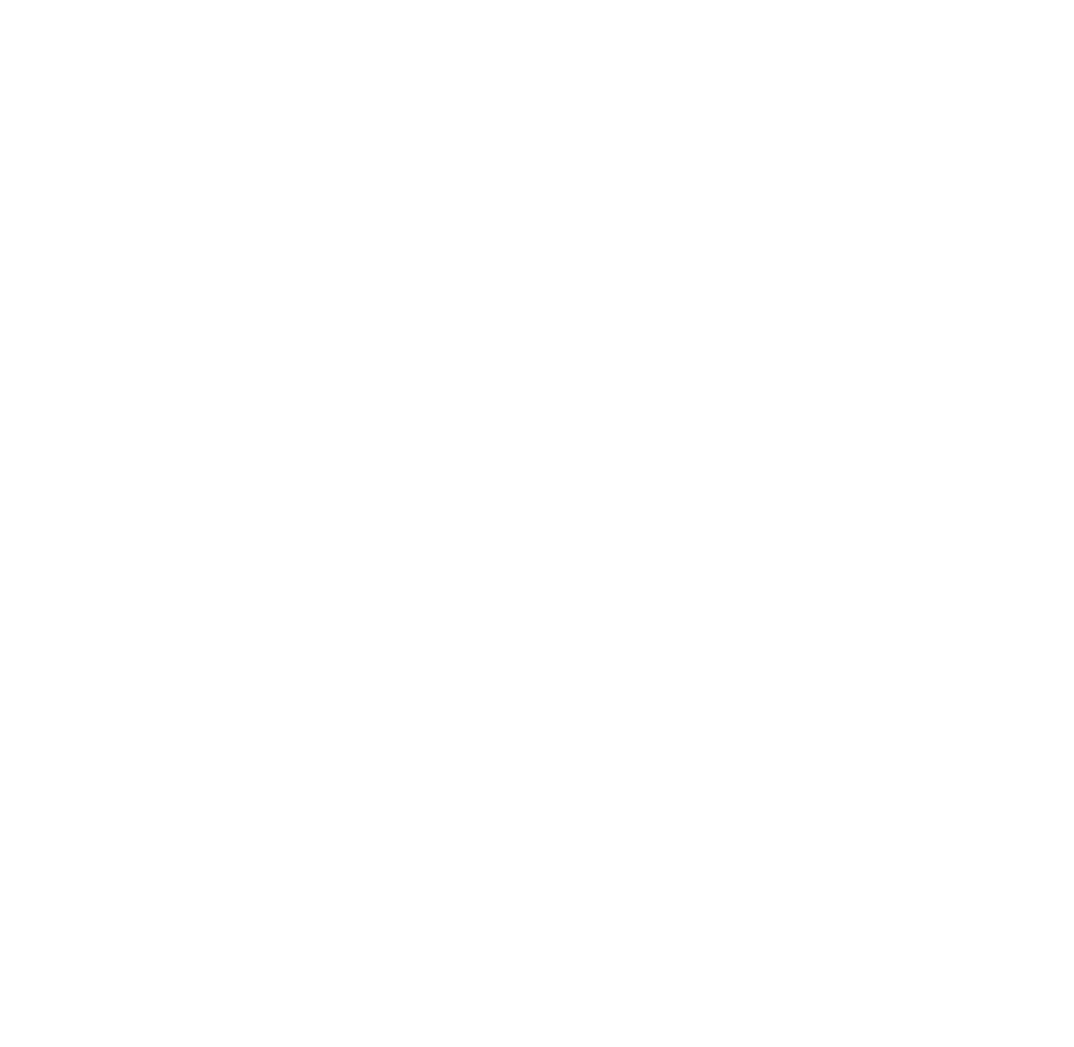

In [54]:
figure, b = plt.subplots()
figure.set_size_inches(19, 19)
plt.axis('off')
plt.savefig("new.png" , dpi=1)